# Application and Comparison of SVM and Logistic Regression on Yeast Data Set

This project aims to predict the <code>localization_site</code> variables of proteins using the <code>yeast</code> dataset containing non-numeric attributes, building upon the findings of a predecessor dataset and using SVM and Logistic Regression models for this purpose.

Now we can start by examining yeast data set's properties.

### Discovering the Data Set

Firstly, let's install and import the data set.

In [1]:
# data set installation
!pip install ucimlrepo
import pandas as pd

print("Data set successfully installed, imported.")
print('Pandas has been imported.')

Data set successfully installed, imported.
Pandas has been imported.


We installed our data set library. We use it like an API. Now, it is time to make our data set usable for the project. Below, we will call our data set and make it <code>Pandas DataFrame</code>.

In [2]:
# import our data set and create its variables
from ucimlrepo import fetch_ucirepo

# fetch dataset
yeast = fetch_ucirepo(id=110)
  
# data (as pandas dataframes)
X = pd.DataFrame(yeast.data.features)
y = pd.DataFrame(yeast.data.targets)

# metadata
# print(yeast.metadata)

# variable information
# print(yeast.variables)

print('Success.')

Success.


### Review of the Data Set

Right now, we are ready to get informations about the data set. Firstly, we will learn about the <code>features</code> and <code>targets</code> about our yeast data set.

In [3]:
# shapes of the data set
print('Shape of X is {} '.format(X.shape))
print('Shape of y is {} '.format(y.shape))

Shape of X is (1484, 8) 
Shape of y is (1484, 1) 


Next, we can show the first 5 columns of our feature and target data set.

In [4]:
# first 5 columns of X
X.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [5]:
# first 5 columns of y
y.head()

,localization_site
0,MIT
1,MIT
2,MIT
3,NUC
4,MIT


As you can see above, we have some numerical values in our feature data set. In our target data set, we have some location sites. From feature data set, we will predict our localization data set. This is our aim in this project.

But first, we need to make our target data set numerical. As you can see above, it has no numerical values in itself. It will be solved later in this project -you can see it in data preprocessing part.

It is time for controlling our columns if they have null values.

In [6]:
# finding if null columns exist in the data sets
print('For our feature data set:\n{}'.format(X.isnull().sum()))
print('\n**************\n')
print('For our variable data set:\n{}'.format(y.isnull().sum()))

For our feature data set:
mcg    0
gvh    0
alm    0
mit    0
erl    0
pox    0
vac    0
nuc    0
dtype: int64

**************

For our variable data set:
localization_site    0
dtype: int64


Good news! There is no empty cells in our data set as you can see. Our data preprocessing part will be faster with this info.

So, we said <code>info</code>. We use <code>.info()</code> for taking some useful infos from our data sets.

In [7]:
# infos from X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
dtypes: float64(8)
memory usage: 92.9 KB


In [8]:
# infos from y
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   localization_site  1484 non-null   object
dtypes: object(1)
memory usage: 11.7+ KB


We know almostly everything about our data sets right now. We know their types, dtypes of every columns, how many entries we have, how many memory we use, etc. It is enough for now.

For now, we will take their <code>.describe()</code> and finish this section.

In [9]:
# some useful informations from X
X.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [10]:
# some useful informations from y
y.describe()

,localization_site
count,1484
unique,10
top,CYT
freq,463


For numerical columns, describe gave us some helpful informations like count, mean, std, quartiles, etc for every column.

Due to we have no numerical values in our target data set, describe gave us how many unique values, what is their freq, etc. It is the description of our y.

That's it. Right now, we can start our <code>Data Preprocessing</code>.

### Data Preprocessing

So far, we learned that our data set has no missing value. After that, we can start our data preprocessing part of the project.

Here, we will prepare our data set and control our variables for creation of our models. Let's start with <code>y</code>.

In [11]:
# first 5 columns of y
y.head()

,localization_site
0,MIT
1,MIT
2,MIT
3,NUC
4,MIT


Here, we can control the unique values of <code>localization_site</code> from our target data set. If there is no values like strings, we are successful.

In [12]:
# find unique values of y
y['localization_site'].unique()

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

Right now, we can make our scaling. Scaling will improve our models performance later. It is one of the important things for data preprocessing part of a data mining project. So it is good to do it.

Right now, we will specialize our columns. After this process, <code>y_target</code> become a 1D Pandas series. Our <code>X_features</code> will continue to be 2D. It is because of <code>X_features</code> has double brackets, <code>y_target</code> has just one.

In [13]:
# preparing datas for the model training
X_features = X[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]
y_target = y['localization_site']

print("Type of X_features:\n", type(X_features), "\nType of y_target:\n", type(y_target))
print("\nDimensions of our features variables are {}D, and for target variable {}D.".format(X_features.ndim, y_target.ndim))

Type of X_features:
 <class 'pandas.core.frame.DataFrame'> 
Type of y_target:
 <class 'pandas.core.series.Series'>

Dimensions of our features variables are 2D, and for target variable 1D.


Right now, we are done. We just scale our <code>X_features</code> variable, and we are ready for create our models.

In [14]:
# scale the X_features
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_features)

print('X_features has been scaled!')

X_features has been scaled!


It is enough for now. Our data set is ready to use.

### Logistic Regression

The time has come for the logistic regression. We will try all of the parameters for <code>train_test_split</code> and print the best one. And we will ignore the errors, because there will be lots of test set without sample error. The reason for this error is that every parameter is tried.

As mentioned, every parameter will be tried and we will find the best one. And create our model again with it.

And we will print the best logistic regression model's <code>confusion matrix</code>.

First of all, let's call the required imports for this model training part.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

print('Everything has imported successfully.')

Everything has imported successfully.


After that, as we mentioned above, let's remove the unimportant warnings here.

In [17]:
# remove warnings
import warnings
warnings.filterwarnings('error') 
warnings.filterwarnings('ignore')

print('Unimportant warnings removed from here.')

Unimportant warnings removed from here.


We are ready. Let's do the <code>Logistic Regression</code>.

The best Parameters: {'random_state': 72, 'test_size': 0.1}
The best Accuracy: 0.6845637583892618
The best Recall: 0.6351461766117421
The best F1 Score: 0.633902386398765
Confusion Matrix:
 [[38  0  0  0  0  0  3  6  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  3  2  2  0  0  0  0]
 [ 0  0  0  0  1 17  1  0  0  0]
 [ 9  0  0  0  1  0 19  1  0  0]
 [12  0  0  0  0  2  0 18  0  0]
 [ 1  0  0  0  0  0  0  0  2  0]
 [ 2  0  0  0  0  2  0  0  0  0]]


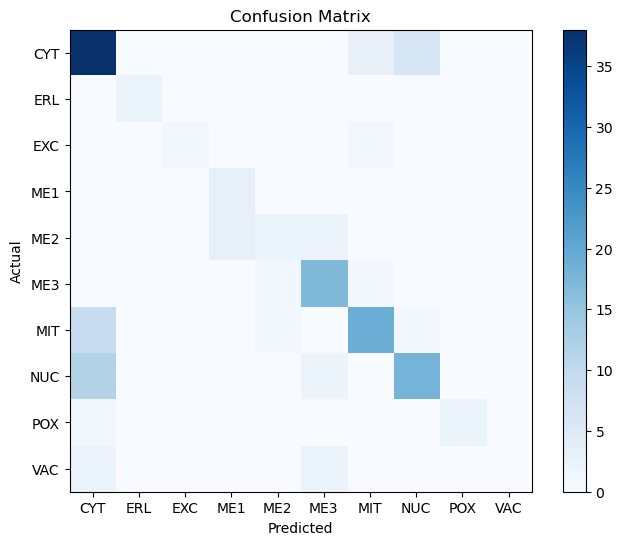

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# logistic regression
best_score = 0
best_params = {}

# create the ranges
random_states = range(1, 101)
test_sizes = np.arange(0.1, 0.5, 0.05)

for random_state in random_states:
    for test_size in test_sizes:
        # split the data set
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=test_size, random_state=random_state)

        # logistic regression
        logreg = LogisticRegression(C = 0.1)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        # calculate the values for the model we created
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # find the best values
        if accuracy > best_score:
            best_score = accuracy
            best_params = {'random_state': random_state, 'test_size': test_size}
            best_recall = recall
            best_f1 = f1

# print the best values
print(f"The best Parameters: {best_params}")
print(f"The best Accuracy: {best_score}")
print(f"The best Recall: {best_recall}")
print(f"The best F1 Score: {best_f1}")

# create the split and logistic regression again with the best parameters
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target,
                                                    test_size=best_params['test_size'],
                                                    random_state=best_params['random_state'])
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# create the confusion matrix and show it with plt
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_target))), np.unique(y_target))
plt.yticks(np.arange(len(np.unique(y_target))), np.unique(y_target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

So, we are done with the <code>Logistic Regression</code>. We will use these values for comparison of SVM and Logistic Regression later in this notebook.

### SVM - Support Vector Machine

The time for SVM has come. Here, we will create a <code>Support Vector Machine</code> model. Like <code>Logistic Regression</code>, we will try to find the best parameters and print them. After finding these values, we will compare these models. Let's start.

The best Params: {'kernel': 'rbf', 'C': 1, 'test_size': 0.1, 'random_state': 46}
The best Accuracy: 0.7248322147651006
The best Recall: 0.7048412698412699
The best F1 Score: 0.6690018756948457
Confusion Matrix:
 [[37  0  0  0  0  1  1  6  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0  0  0]
 [ 0  0  1  4  0  0  0  0  0  0]
 [ 0  0  0  0  2  2  0  0  0  0]
 [ 0  0  0  0  0 19  0  1  0  0]
 [ 6  0  0  0  1  1 14  1  1  0]
 [13  0  0  0  0  0  2 27  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  1  1  0  0  0  0]]


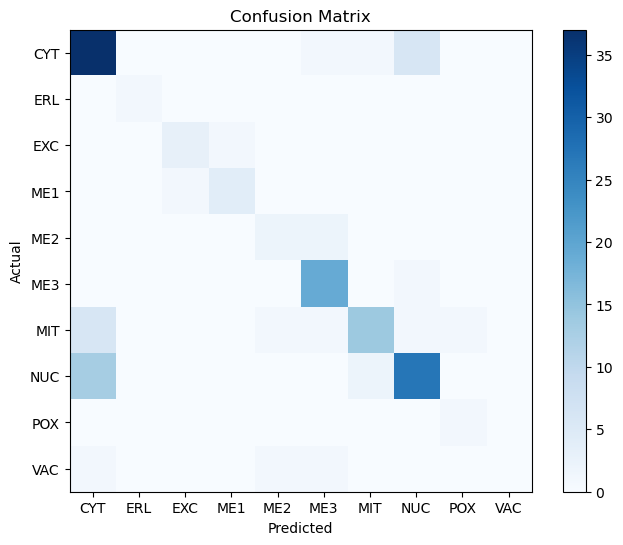

In [21]:
# svm
best_score = 0
best_params = {}

# create the lists of what we will try
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10, 100]
random_states = range(1, 101)
test_sizes = np.arange(0.1, 0.5, 0.05)

for kernel in kernels:
    for c in c_values:
        for test_size in test_sizes:
            for random_state in random_states:
                # split the data set
                X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=test_size, random_state=random_state)

                # create the svm model
                svm = SVC(kernel=kernel, C=c)
                svm.fit(X_train, y_train)
                y_pred = svm.predict(X_test)

                # calculate the accuracy of the model
                accuracy = accuracy_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred, average='macro')
                f1 = f1_score(y_test, y_pred, average='macro')

                # find the best parameters for the model
                if accuracy > best_score:
                    best_score = accuracy
                    best_params = {'kernel': kernel, 'C': c, 'test_size': test_size, 'random_state': random_state}
                    best_recall = recall
                    best_f1 = f1

# print the informations about the best parameters of  the model
print(f"The best Params: {best_params}")
print(f"The best Accuracy: {best_score}")
print(f"The best Recall: {best_recall}")
print(f"The best F1 Score: {best_f1}")

# create model again with the best parameters
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=best_params['test_size'], random_state=best_params['random_state'])
svm = SVC(kernel=best_params['kernel'], C=best_params['C'])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# creation of confusion matrix for svm
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_target))), np.unique(y_target))
plt.yticks(np.arange(len(np.unique(y_target))), np.unique(y_target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We are done with <code>SVM</code>. We will use these parameters after this section.

### Comparison of SVM and Logistic Regression

Now, we will compare the models we create. This section will show that which one will be helpful for us in the future.

Let's create the plot.

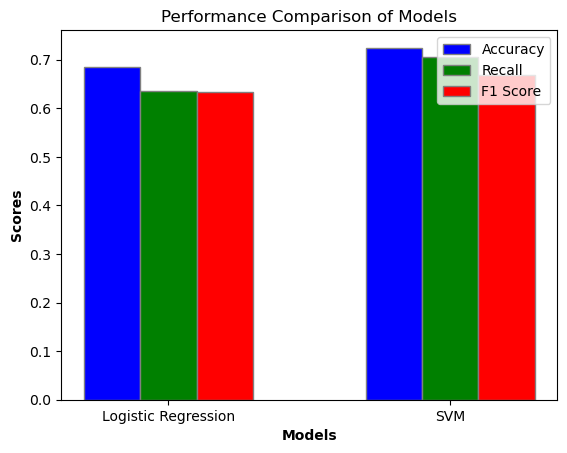

In [23]:
# model names
models = ['Logistic Regression', 'SVM']

# values of the models
accuracies = [0.6845637583892618, 0.7248322147651006]
recalls = [0.6351461766117421, 0.7048412698412699]
f1_scores = [0.633902386398765, 0.6690018756948457]

# the bar width
bar_width = 0.2

# coordinates
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# create the plot
plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, recalls, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='r', width=bar_width, edgecolor='grey', label='F1 Score')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Comparison of Models')
plt.legend()
plt.show()

Here, we can clearly see that <code>SVM</code> is better than <code>Logistic Regression</code>. <code>SVM</code> has 72% of accuracy, 70% of recall, and 67% of F1 Score which is better than 68%-63%-63% (Logistic Regression).

You have reached the end of this project.

## Author

### Mert Kont